In [1]:
from math import *
import numpy as np
import sympy as sy
from sympy import *

知识重点
---
1. **质心公式**  
$\bar{x} \cdot m=\int_{x1}^{x2}{xf(x)dx}$  
$\bar{y} \cdot m=\int_{x1}^{x2}{\frac{f(x)^2}{2}dx}$
  
2. **转动惯量公式**  
$
I_C=\int_{x_1}^{x_2}{\int_{y_1}^{y_2}{\rho \cdot D^2}} 多重积分  
$  
$
D=\sqrt{x^2+y^2}
$

参考公式
---
http://mechref.engr.illinois.edu/dyn/rem.html

题目列表
---
1. 1101 转动惯量+质心 *题型①*
2. 1107 质心 (简单)
3. 1084 质量 (简单) *题型①*
4. 487  质心 (简单) *题型②*
5. 1120 转动惯量   *题型②*
6. 1146 转动惯量+质心 *题型①*
7. 753 转动惯量 (套公式)

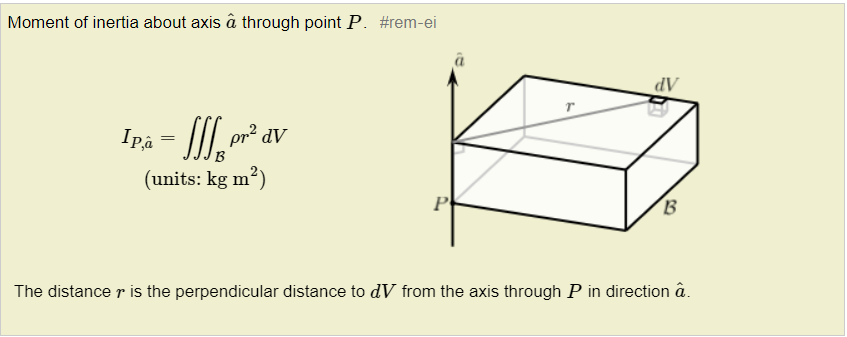

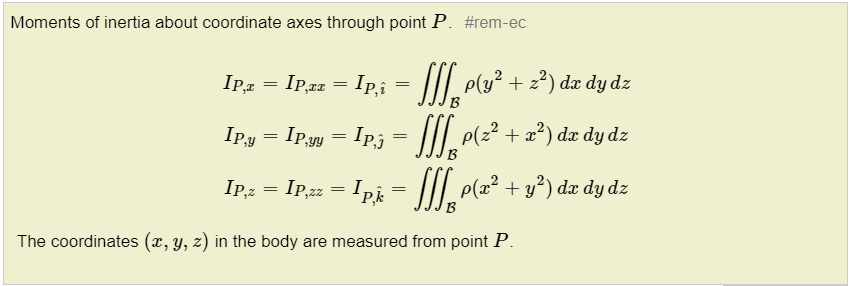

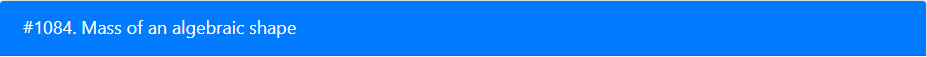

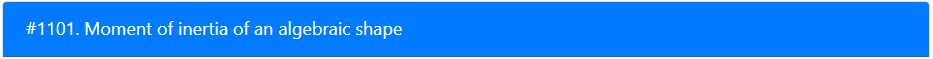

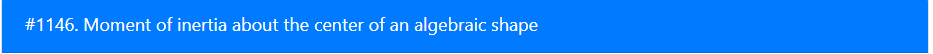

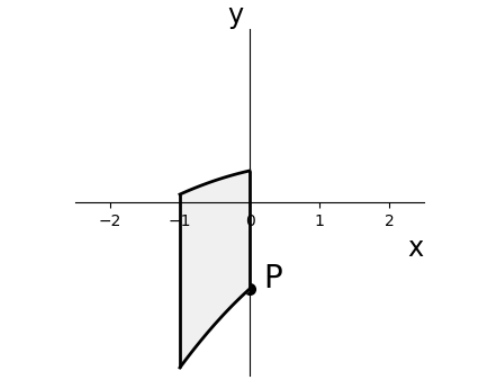

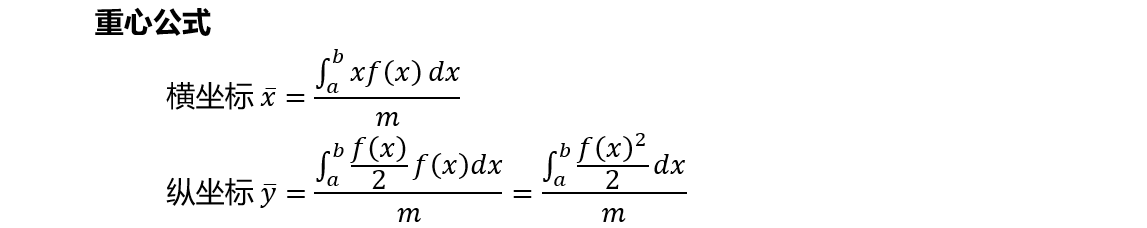

$$
I_C=\int_{x_1}^{x_2}{\int_{y_1}^{y_2}{\rho \cdot D^2}}  
$$
$$
D=\sqrt{x^2+y^2}
$$

In [2]:
x, y ,r= symbols('x, y, r')
################################
rho = 7
y1 = -2*x**2 - 8*x - 11
y2 = x**2 + 4*x + 7
x1 = 1
x2 = 2
Px = 1
Py = 12
################################复制部分


#计算质心位置
S=integrate(y2-y1,[x,x1,x2])
xC=integrate((y2-y1)*x,[x,x1,x2])/S
yC=integrate(y2**2/2-y1**2/2,[x,x1,x2])/S

#计算相对距离
origin=np.array([Px,Py])
center=np.array([xC,yC])
D1=np.linalg.norm((center-origin).astype(float).flatten())

#计算相对质心的转动惯量
equ=rho*((x-xC)**2+(y-yC)**2)
IC=integrate(integrate(equ,[y,y1,y2]),[x,x1,x2])

#平行轴定理 
I_parallel=S*rho*D1**2
I=IC+I_parallel

float(S*rho),float(IC),float(I)

(301.0, 49491.70540697675, 150484.1)

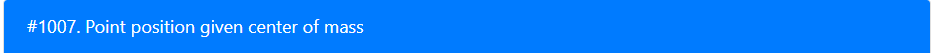

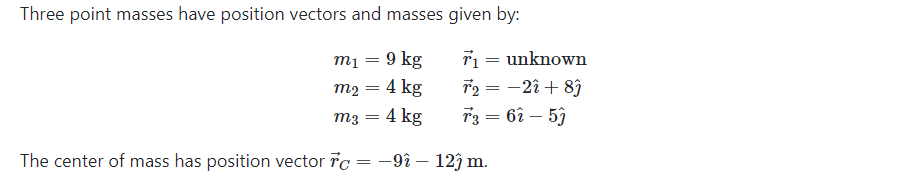

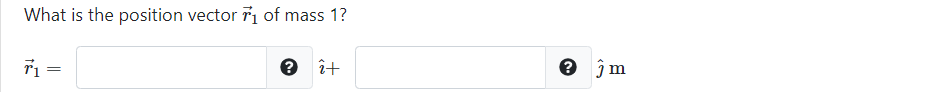

In [3]:
m1 = 7
m2 = 6
m3 = 6
r2 = np.array([ 1, -2,  0])
r3 = np.array([-3, -8,  0])
rC = np.array([-7,  5,  0])

#设r1
x,y,z=sy.S('x,y,z')
r1=np.array([x,y,z])

#表示质心
rc=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

equ=rC-rc
ans=sy.solve([equ[0],equ[1],equ[2]],[x,y,z])
x=float(ans[x])
y=float(ans[y])

x,y

(-17.285714285714285, 22.142857142857142)

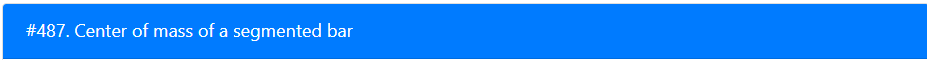

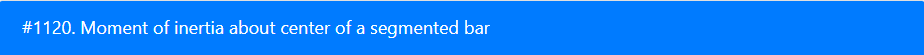

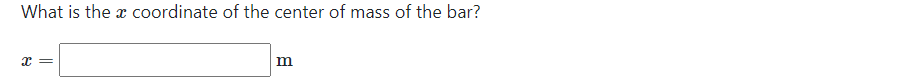

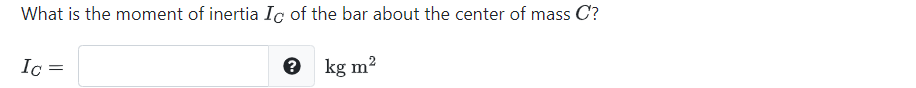

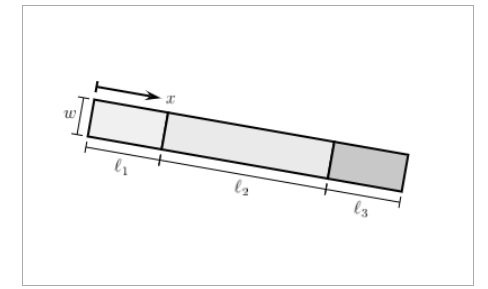

In [24]:
w = 2
l1 = 6
rho1 = 9
l2 = 7
rho2 = 8
l3 = 4
rho3 = 1
#########复制部分

x,y=sy.S('x,y')

x1=l1*0.5
x2=l1+l2*0.5
x3=l1+l2+l3*0.5

m1=l1*rho1*w
m2=l2*rho2*w
m3=l3*rho3*w

xC=(m1*x1+m2*x2+m3*x3)/(m1+m2+m3)

#多重积分法
I1=integrate((integrate(rho1*(x**2+y**2),[x,    0-xC,      l1-xC])),[y,-w/2,w/2])
I2=integrate((integrate(rho2*(x**2+y**2),[x,   l1-xC,   l1+l2-xC])),[y,-w/2,w/2])
I3=integrate((integrate(rho3*(x**2+y**2),[x,l1+l2-xC,l1+l2+l3-xC])),[y,-w/2,w/2])

#公式法
#I1=1/12*m1*(w**2+l1**2)
#I2=1/12*m2*(w**2+l2**2)
#I3=1/12*m3*(w**2+l3**2)
#IC=I1+I2+I3+m1*(xC-x1)**2+m2*(xC-x2)**2+m3*(xC-x3)**2

IC=I1+I2+I3

xC,IC

(6.614035087719298, 3774.03508771930)

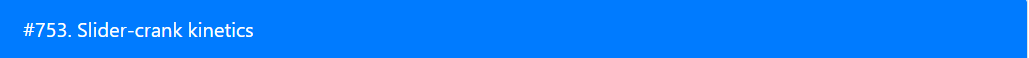

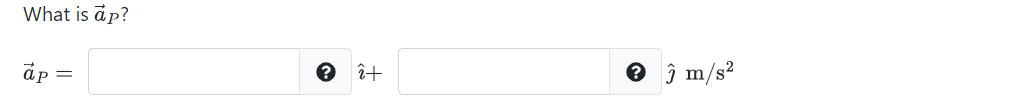

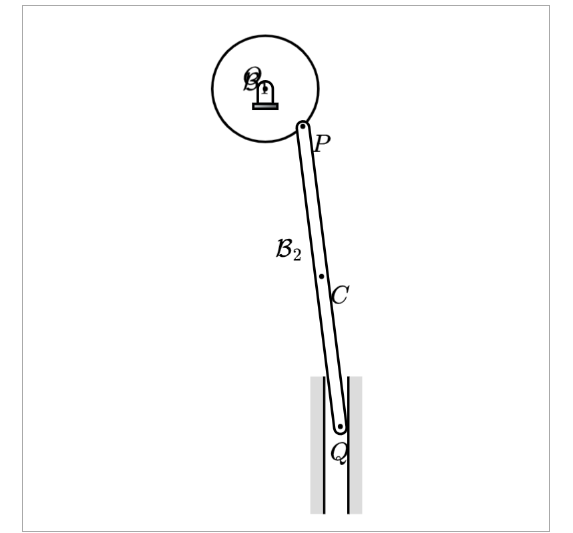

In [160]:
m1 = 2.000
m2 = 6.000
I1 = 2.000
I2 = 32.500
rOP = Matrix([1, 1, 0])
rPQ = Matrix([-1, -8,  0])
omega1 = Matrix([0.000, 0.000, 8.000])
omega2 = Matrix([0, 0, 1])
vP = Matrix([-8.000, 8.000, 0.000])
vQ = Matrix([0.000, 7.000, 0.000])
alpha2 = Matrix([0.000, 0.000, 2.000])
FP = Matrix([-74.125, -648.000, 0.000])
M = Matrix([0.000, 0.000, -667.875])
############################################
key=0 #0代表竖直,1代表水平

rQP=-rPQ

z1,z2,x,y=S('z1,z2,x,y')
alpha1=Matrix([0,0,z1])
alpha2=Matrix([0,0,z2])

aPO=alpha1.cross(rOP)+omega1.cross(omega1.cross(rOP))
aPQ=alpha2.cross(rQP)+omega2.cross(omega2.cross(rQP))

aP=aPO
aQ=aP-aPQ                         
ans=solve([aQ[key],z2-2],[z1,z2])  #因为Q点限制条件→z1,z2 天然自带关系，aP,aQ,alpha1,alpha2知道任意一个都可以解出其他3个
z1_v=ans[z1]
z2_v=ans[z2]

alpha1=alpha1.subs(z1,z1_v)
alpha2=alpha2.subs(z2,z2_v)
aP=aP.subs(z1,z1_v).subs(z2,z2_v)
aQ=aQ.subs(z1,z1_v).subs(z2,z2_v)
aC=aQ+alpha2.cross(rQP/2)+omega2.cross(omega2.cross(rQP/2))

FQ=m2*aC-FP
FQ

Matrix([
[23.125],
[     0],
[     0]])

$$I_1 \cdot \alpha_1=M+r_{OP} \times (-FP)$$
$$F_{P}+F_{Q}=m_2 \cdot a_c$$

因为Q点限制条件→z1,z2 天然自带关系，aP,aQ,alpha1,alpha2知道任意一个都可以解出其他3个
---